<a href="https://colab.research.google.com/github/ayush-09/K-Means-Clustering/blob/master/Unsupervised_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Algorithm
- Salaray Dataset from kaggle name salary.csv : https://www.kaggle.com/rsadiq/salary
- K-means++ Clustering algoritm(k=3), I choose K-means++ instead instead of K-means because it doesnot chosse any random for centroid.
k=3 is fit after check the wscc and silhouette score for each k value.
- I plot both the graphs **Elbow Method** and **Silhoutte** for the best cluster value.
- After made the model I will check the sum of square error of the first 10 iteration of the model by plot the graph.

## Connect with drive


In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Import the libraries


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Visualize the data


In [4]:
df=pd.read_csv("/content/gdrive/MyDrive/archive/Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


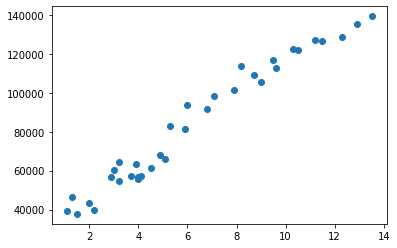

In [5]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [6]:
X=df[['YearsExperience','Salary']]

## Calculate the WCSS and Silhouette Score

In [7]:
wcss =[]
silhouette=[]
for i in range(2,8):
    k_means = KMeans(n_clusters=i,init = 'k-means++', random_state=20)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    pred = k_means.predict(X)
    silhouette.append(silhouette_score(X,pred))
    print("Cluster = {0}, wcss={1}, Silhouette= {2}".format(i,k_means.inertia_,silhouette_score(X,pred)))

Cluster = 2, wcss=6062232833.744474, Silhouette= 0.7028572890853004
Cluster = 3, wcss=2903864662.5549126, Silhouette= 0.6331618019952167
Cluster = 4, wcss=1663816733.7989414, Silhouette= 0.6368549820565115
Cluster = 5, wcss=894398887.721595, Silhouette= 0.6173381925348792
Cluster = 6, wcss=652477856.6519287, Silhouette= 0.627089162952214
Cluster = 7, wcss=441789859.79249996, Silhouette= 0.6421588941076305


## Ploting the Graphs

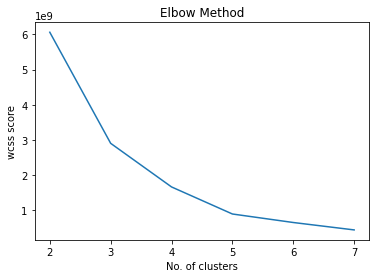

In [8]:
plt.plot(range(2,8),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss score')
plt.show()


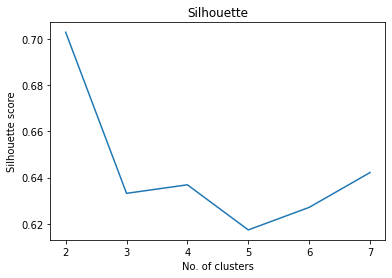

In [9]:
plt.plot(range(2,8),silhouette)
plt.title('Silhouette')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.show()


## Train the model


In [10]:
km=KMeans(n_clusters=5, init='k-means++',max_iter=100,verbose=True)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=True)

## Prediction

In [11]:
y_predicted=km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 944865214.6304046
start iteration
done sorting
end inner loop
Iteration 1, inertia 944865214.6304046
center shift 0.000000e+00 within tolerance 5.024411e+04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1504371017.23425
start iteration
done sorting
end inner loop
Iteration 1, inertia 1504371017.23425
center shift 0.000000e+00 within tolerance 5.024411e+04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1198190608.6271667
start iteration
done sorting
end inner loop
Iteration 1, inertia 1198190608.6271667
center shift 0.000000e+00 within tolerance 5.024411e+04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1251859328.2879996
start iteration
done sorting
end inner loop
Iteration 1, inertia 1158509896.5262141
start iteration
done sorting
end inner loop
Iteration 2, inertia 11585

array([4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
df['cluster']=y_predicted
df

,YearsExperience,Salary,cluster
0,1.1,39343,4
1,1.3,46205,4
2,1.5,37731,4
3,2.0,43525,4
4,2.2,39891,4
5,2.9,56642,0
6,3.0,60150,0
7,3.2,54445,0
8,3.2,64445,0
9,3.7,57189,0


In [13]:
print(np.unique(km.labels_,return_counts= True))

(array([0, 1, 2, 3, 4], dtype=int32), array([12,  5,  6,  7,  5]))


Text(0, 0.5, 'Salary')

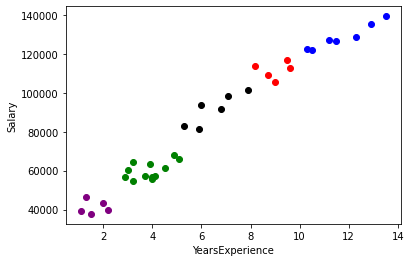

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.scatter(df4.YearsExperience, df4['Salary'],color='blue')
plt.scatter(df5.YearsExperience, df5['Salary'],color='purple')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

## Normalization and then again check

In [15]:
scaler=MinMaxScaler()
scaler.fit(df[['Salary']])
df['Salary']=scaler.transform(df[['Salary']])
scaler.fit(df[['YearsExperience']])
df['YearsExperience']=scaler.transform(df[['YearsExperience']])

df


,YearsExperience,Salary,cluster
0,0.000000,0.015845,4
1,0.016129,0.083296,4
2,0.032258,0.000000,4
3,0.072581,0.056952,4
4,0.088710,0.021232,4
5,0.145161,0.185887,0
6,0.153226,0.220369,0
7,0.169355,0.164291,0
8,0.169355,0.262587,0
9,0.209677,0.191263,0


In [16]:
km=KMeans(n_clusters=5, init='k-means++',max_iter=100,verbose=True)
y_predicted=km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.24599877930393588
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.21469464378831662
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.21469464378831662
center shift 0.000000e+00 within tolerance 8.990979e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.24976734481600707
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.2340310975743367
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.21368181551259902
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.21368181551259902
center shift 0.000000e+00 within tolerance 8.990979e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.276907403808879
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.24463440390283883
start iteration
done sorting
end inner loop
Iteration 

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4], dtype=int32)

Text(0, 0.5, 'Salary')

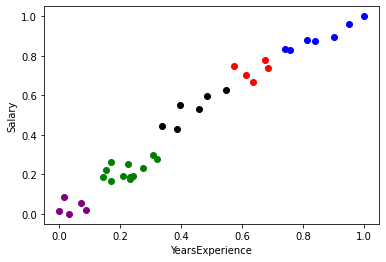

In [17]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.scatter(df4.YearsExperience, df4['Salary'],color='blue')
plt.scatter(df5.YearsExperience, df5['Salary'],color='purple')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

## Cluster Centroids

In [18]:
km.cluster_centers_

array([[0.22379032, 0.21971268],
       [0.66935484, 0.75627898],
       [0.43548387, 0.5296787 ],
       [0.04193548, 0.03546504],
       [0.9016129 , 0.92270234]])

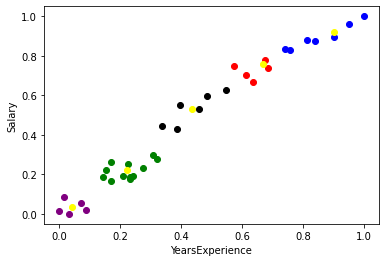

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.scatter(df4.YearsExperience, df4['Salary'],color='blue')
plt.scatter(df5.YearsExperience, df5['Salary'],color='purple')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow')

## Sum of Square Error

In [20]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)

In [21]:
sse

[6.293685484541874,
 1.292690919141886,
 0.6527227565513628,
 0.4101141952961812,
 0.21368181551259902,
 0.15226682764323596,
 0.12182725552641988,
 0.08849338117507208,
 0.0759704313741079]

## Plot the SSE

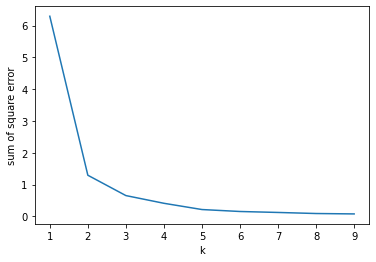

In [22]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

In [23]:
import joblib
joblib.dump(km,'K-means++_model.pkl')

['K-means++_model.pkl']